In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons

In [26]:
X,Y=make_moons?


In [51]:
X,Y=make_moons(n_samples=1000 ,shuffle=True, noise=0.2,random_state=1)

In [52]:
#X,Y=make_blobs(n_samples=500,centers=2,n_features=2,random_state=1)

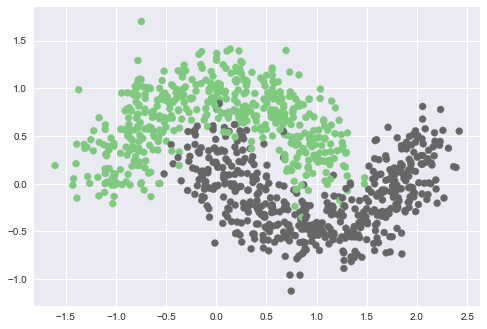

In [53]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)

In [54]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [55]:
z=np.array([1,2,3,4,5])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

- learn the weight 
- reduce the loss
- make the preditctions

In [56]:
def predict (X,weights):
    z=np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions

In [57]:
def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_=predict(X,weights)
    cost=np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost

In [58]:
def update(X,Y,weights,learning_rate):
    """perform Weights update for 1 epoch"""
    Y_=predict(X,weights)
    dw=np.dot(X.T,Y_-Y) 
    m=X.shape[0]
    weights=weights-learning_rate*dw/(float(m))
    return weights

In [59]:
def train(X,Y,learning_rate=0.5,maxEpochs=100):
    """Modify the input to handle the bias term"""
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    """Init weights 0"""
    weights=np.zeros(X.shape[1])
    for epoch in range(maxEpochs):
        weights=update(X,Y,weights,learning_rate)
        if epoch%10==0:
            l=loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights

In [60]:
weights=train(X,Y,maxEpochs=500)

Epoch 0 Loss 0.6481
Epoch 10 Loss 0.4575
Epoch 20 Loss 0.4005
Epoch 30 Loss 0.3729
Epoch 40 Loss 0.3562
Epoch 50 Loss 0.3447
Epoch 60 Loss 0.3362
Epoch 70 Loss 0.3296
Epoch 80 Loss 0.3244
Epoch 90 Loss 0.3201
Epoch 100 Loss 0.3166
Epoch 110 Loss 0.3136
Epoch 120 Loss 0.3111
Epoch 130 Loss 0.3090
Epoch 140 Loss 0.3072
Epoch 150 Loss 0.3056
Epoch 160 Loss 0.3042
Epoch 170 Loss 0.3031
Epoch 180 Loss 0.3020
Epoch 190 Loss 0.3011
Epoch 200 Loss 0.3004
Epoch 210 Loss 0.2997
Epoch 220 Loss 0.2991
Epoch 230 Loss 0.2985
Epoch 240 Loss 0.2980
Epoch 250 Loss 0.2976
Epoch 260 Loss 0.2972
Epoch 270 Loss 0.2969
Epoch 280 Loss 0.2966
Epoch 290 Loss 0.2963
Epoch 300 Loss 0.2960
Epoch 310 Loss 0.2958
Epoch 320 Loss 0.2956
Epoch 330 Loss 0.2954
Epoch 340 Loss 0.2953
Epoch 350 Loss 0.2951
Epoch 360 Loss 0.2950
Epoch 370 Loss 0.2949
Epoch 380 Loss 0.2948
Epoch 390 Loss 0.2947
Epoch 400 Loss 0.2946
Epoch 410 Loss 0.2945
Epoch 420 Loss 0.2944
Epoch 430 Loss 0.2943
Epoch 440 Loss 0.2943
Epoch 450 Loss 0.2942

In [61]:
def getpredictions(X_test,weights,labels=True):
    if X_test.shape[1]!=weights.shape[0]:
        ones=np.ones((X_test.shape[0],1))
        X_test=np.hstack((ones,X_test))
    probs=predict(X_test,weights)
    if not labels:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels
    

In [62]:
a=np.zeros((5,5))
a[2,3]=10
print(a)
a[a>0]=20
print(a)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. 20.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [70]:
x1=np.linspace(-2,2,10)
print(x1)
x2=-(weights[0]+weights[1]*x1)/weights[2]

[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]


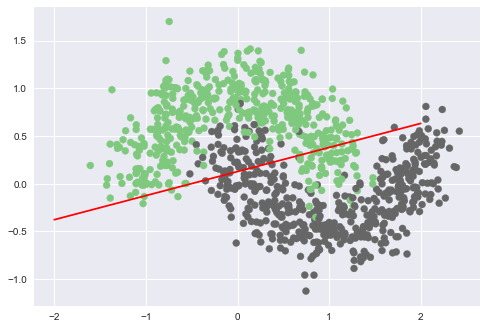

In [71]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c="red")
plt.show()

In [72]:
Y_=getpredictions(X,weights,labels=True)

In [73]:
print(Y_)

[0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.

In [74]:
training_acc=np.sum(Y_==Y)/Y.shape[0]

In [75]:
print(training_acc)

0.868


In [76]:
print(Y)

[1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1
 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1
 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1
 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 